# K-means algoritam

**Sadržaj:**
1. [Problem klasterizacije](#Problem-klasterizacije)
1. [K-means algoritam](#K-means-algoritam)
    1. [Uslovi izlaska iz iteracije](#Uslovi-izlaska-iz-iteracije)
    1. [Ugrađena K-means funkcija Python-a](#Ugrađena-K-means-funkcija-Python-a)
1. [Određivanje broja klastera](#Određivanje-broja-klastera)
    1. [Inercija](#Inercija)
    1. [Koeficijent siluete](#Koeficijent-siluete)
1. [Karakteristike K-means klasterizacije](#Karakteristike-K-means-klasterizacije)

In [1]:
import numpy as np
import numpy.random as rndm
import matplotlib as mplb
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

## Problem klasterizacije

Data mining predstavlja numerički proces namenjen istraživanju i otkrivanju šablona u velikim skupovima podataka. Pre samog postupka ekstrakcije podataka neophodno je podatke skupiti iz različitih baza i repozitorija i prevesti ih u oblik koji je pogodan za obradu. Ovde se nećemo baviti takvim postupcima prikupljanja i pripreme podataka, tzv. predprocesiranjem podataka. Zbog toga, u nastavku, smatraćemo da su podaci već smešteni u matrice numeričkih vrednosti gde predstavljaju neku vrstu merenja različitih veličina koje se prate kroz vreme ili po nekom drugom osnovu.  

Klaster analiza ili klasterizacija predstavlja proces razmeštaja skupa podataka u neprazne podskupove. Svaki pojedinačni podskup zovemo klaster. Smisao klastera je objedinjavanje objekata međusobno sličnih u jedan klaster, tom prilikom objekti koji se veoma razlikuju od njih su izmešteni po drugim klasterima. Kreiranje skupa klastera jednostavno zovemo [klasterizacija](https://en.wikipedia.org/wiki/Cluster_analysis#Centroid-based_clustering). U analizi klastera različiti principi poređenja i objedinjavanja mogu da generišu različite klasterizacije jednog istog skupa podataka. Samu klaster analizu ne sprovode ljudi već algoritam namenjen tome. Shodno tome klasterizacija, ili automatizovana klasifikacija, je interesantan koncept s obzirom da može da dovede do otkrića neočekivanih grupa unutar podataka.

Osnovna karakteristika algoritama klasterizacije je da šabloni, tj. kriterijumi razvrstavanja nisu unapred poznati ili zadati. Cilj je da kroz izračunavanja, uz jasno definisane kriterijume i postupke, mašina samostalno kreira internu reprezentaciju skupa podataka, tj. njegovo raspoređivanje u klastere. Algoritmi klasterizacije namenjeni su da uoče osobine podataka koje ih čine optimalnim za razvrstavanje. U postupku klasterizacije numerička svojstva objekata po kojima se grupišu u klastere nisu unapred poznata, drugim rečima, i kriterijum i klasteri se konfigurišu samim algoritmom. Klaster analiza predstavlja oblik učenja
na osnovu obzervacija, a ne učenje na osnovu primera. Zbog toga se klasterizacija ubraja u alate [nenadgledanog mašinskog učenja](https://en.wikipedia.org/wiki/Unsupervised_learning). 

<div>
   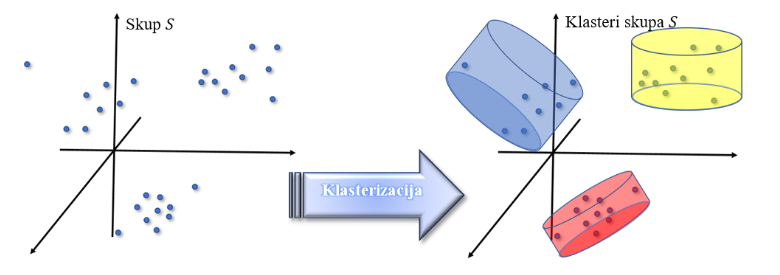  
</div>

Kao jedna od opcija data mining-a, klaster analiza može da se koristi samostalno za dobijanje uvida u distribuciju podatka, za isticanje karakteristika svakog klastera, i za izdvajanje posebnog klastera podataka za njegovu dalju analizu. Sa druge strane, klasterizacija može da posluži i kao korak u pretprocesiranju podataka za neki drugi algoritam koji bi zatim dalje delovao nad detektovanim klasterima i odabranim atributima podataka.

Klaster analiza se u pojedinim oblastima primene naziva još i segmentacija podataka. Tom prilikom segmente podataka čine slični objekti među sobom. Osim uočavanja sličnosti klaster analiza je veoma korisna u otkrivanju izuzetaka u podacima (outliers), tj. podataka koji puno odstupaju od preostalih grupisanih podataka. Primene otkrivanja izuzetaka uključuju pronalaženje prevara kreditnim karticama i nadgledanje kriminalnih aktivnosti u elektronskoj trgovini ili u poreskim prevarama.

U oblasti statistike klaster analiza se intenzivno proučava sa glavnim fokusom na klasterizaciji baziranoj na rastojanju. Najjednostavnija i najosnovnija verzija klaster analize je kreiranje particije podatka. To znači da se podaci razmeštaju u $k$ nepraznih disjunktnih podskupova. Sam parametar $k$ je polazna tačka svih particionih metoda.

Formalno, za  dati skup $S$ od $n$ podataka zadatih $m-$dimenzionalnim vektorima
$$v_j=\begin{bmatrix} x_0&x_1&\dots&x_{m-1}\end{bmatrix},\qquad j\in(n)>>m$$
odabarano je $k<<m,n,$ tj. unapred je dato. Particioni algoritam kreira organizaciju skupa $S$ u $k$ klastera $C_0,C_1,\dots,C_{k-1}\subset S.$  Osobine klastera $C_i$ su:
\begin{align}
&C_i\neq\emptyset, && \bigcup_{i\in(k)}C_i=S,\\
&C_i\cap C_j=\emptyset, &&i\neq j.
\end{align}
Klasteri nemaju preklapanja elemenata i formirani su sa ciljem optimizacije neke odabrane funkcije kojom je opisan kriterijum particije. U pitanju su funkcije kojima se meri različitost podataka bazirana na rastojanju. Particija podrazumeva razmeštaj objekata unutar jednog klastera koji su među sobom sličniji, i različitiji u odnosu na objekte u drugim klasterima. Različitost i sličnost se meri kroz vrednosti atributa tih objekata. 

Postizanje globalnog minimuma u particionom algoritmu klasterizacije je najčešće računski neizvodljivo. Potencijalno bi bilo potrebno pravljenje svih mogućih particija i njihovo poređenje. Umesto toga većina implementiranih algoritama koristi popularne heuristike. Heuristika predstavlja tehniku rešavanja nekog problema koja vodi ka brzom i praktičnom rešenju. Za klasterizaciju particijom to su iterativni algoritmi koji progresivno popravljaju kvalitet klasterizacije i približavaju se lokalno najboljem rešenju. Ovakvi  metodi pokazuju kvalitetne rezultate u slučaju klastera sfernog oblika i za ne previše velike dimenzije ili skupove podataka.

Klasterizacija metodom particije kreira početnu (inicijelnu) podelu skupa podataka. Zatim koristi tehnike iterativnog razmeštanja (relokacije) kojima se radi na poboljšanju karakteristika particije. To podrazumeva premeštanje objekata iz jednog klastera u drugi. Jedan od takvih algoritama je K-means.

***

## K-means algoritam

Tema ovog odeljka je najjednostavniji i najpopularniji algoritam za grupisanje podataka u skupove. Algoritam K-means, tj. K-srednjih vrednosti, zbog svoje jednostavnosti ideje i implementacije, kao i brzine realizacije, predstavlja jedan od najčešće primenjivanih algoritama klasterizacije. Koncept optimalnosti koji se primenjuje u K-means algoritmu oslanja se na dve premise:
- centar klastera je centar skupa vektora koji pripadaju jednom klasteru 
- svaki element skupa podataka bliži je centru svog klastera nego centrima drugih.

K-means algoritam za svaki od klastera pronalazi po jednog tipičnog predstavnika - centar tog klastera. U odnosu na centar se vrši preraspored objekata iz skupa podataka u klastere.

Neka je skup podatka $S$ razvrstan u $k$ klastera $C_0,C_1,\dots,C_{k-1}\subset S.$ Centar $c_i$ klastera $C_i$ je centar skupa vektora koji su dodeljeni ovom klasteru. Ukoliko je $n_i=|C_i|$ broj elemenata skupa $C_i,$ i $I_i$ skup indeksa elemenata iz skupa $S$ koji se nalaze u klasteru $C_i,$ tada je
$$c_i=\frac{1}{n_i}\sum_{j\in I_i}v_j=\frac{1}{|I_i|}\sum_{j\in I_i}v_j=\frac{1}{|C_i|}\sum_{v_j\in C_i}v_j.$$

**Primer 1.** Neka je dat skup $S=\{v_0,v_1,\dots,v_{12}\},\ n=13.$ Karakteristike za $k=3$ klastera $C_i$ su recimo:
\begin{align}
&C_0=\{v_0,v_4,v_7\}, && I_0=\{0,4,7\}, && n_0=|C_0|=|I_0|=3,&& c_0=\displaystyle{\frac{v_0+v_4+v_7}{3}},\\
&C_1=\{v_1,v_6,v_{9},v_{11},v_{12}\}, && I_1=\{1,6,9,11,12\}, && n_1=|C_1|=|I_1|=5,&& c_1=\displaystyle{\frac{v_1+v_6+v_{9}+v_{11}+v_{12}}{5}},\\
&C_2=\{v_2,v_3,v_5,v_8,v_{10}\}, && I_2=\{2,3,5,8,10\}, && n_2=|C_2|=|I_2|=5, && c_2=\displaystyle{\frac{v_2+v_3+v_5+v_8+v_{10}}{5}}.
\end{align}

***

Cilj K-means algoritma je da rasporedi elemente skupa $S$ po klasterima na način kojim se minimizira neka mera rastojanja, tj. maksimizuje [mera sličnosti](https://en.wikipedia.org/wiki/Similarity_measure), između elemenata unutar jednog klastera. Izbor mere sličnosti zavisi od primene do primene, od slučaja do slučaja. Neki primeri mera su: 
- suma kvadrata Euklidovih rastojanja između elemenata u klasteru i centra klastera,
- suma $L_p,\ p\geq1$ rastojanja između elemenata u klasteru i centra klastera,
- suma kosinusnih razlika elemenata jednog klastera od odgovarajućeg centra klastera,...

Ove standardne mere mogu da se kombinuju sa statističkim karakteristikama vektora u klasteru. Pojedini primeri mera sličnosti mogu se upoznati i na sledećem [linku](https://dataaspirant.com/five-most-popular-similarity-measures-implementation-in-python/).

Za pokretanje K-means algoritma neophodo je obezbediti sledeće početne podatke:
- skup $S,$
- broj klastera $k,$
- početne vrednosti centara klastera $c_i,$
- meru rastojanja $dsim.$

Početne vrednosti centara klastera se obično biraju kao proizvoljnih $k$ elemenata skupa $S,$ ili nekih drugih $k$  proizvoljnih vektora prostora $\mathbb{R}^m.$

Na osnovu unetih početnih vrednosti, algoritam K-means kroz iteracije generiše sadržaj $k$ klastera i sa novim sadržajem klastera preračunava vrednosti centara. Blok naredbi koji se u svakoj iteraciji obavlja vrši sledeća izračunavanja: 

>1. Za svaku tačku $v_j$ skupa $S,\ j\in(n)$:
>    1. Vrši se izračunavanje odstupanja tačke $v_j$ od centara svih klastera $c_i,\ i\in(k)$
>    $$d_{ij}=dsim(c_i,v_j),\qquad i\in(k).$$
>    2. Na osnovu izračunatih rastojanja $d_{ij}$ tačka $v_j$ dodeljuje se klasteru sa najbližim centrom,
>    $$v_j\in C_p\quad\Longleftrightarrow\quad dsim(c_p,v_j)\leq dsim(c_i,v_j),\ i\in(k).$$
>2. Na osnovu utvrđenog sadržaja klastera $C_i$ računaju se novi centri $c_i,\ i\in(k).$

U nastavku je dato objašnjenje postupka samog K-means algoritma u njegovom najkonvencionalnijem obliku. 

**Primer 2.** Primenićemo K-means na skup tačaka $S$ iz 2D sa $2$ klastera $(m=2,\ k=2).$ Koristićemo Euklidovo rastojanje kao meru $dsim.$ Dakle, funkcija koju želimo da minimiziramo unutar klastera je varijansa objekata u klasteru u odnosu na njegov centar. Kreiraćemo dve grupe tačaka u 2D sa normalnom raspodelom u vrednostima koordinata. Na taj način kreiran je test primer koji će da nam pomogne da pratimo tok i merimo rezultat K-means algoritma grafičkim putem.

In [2]:
#broj elemenata svake od grupa
n0=rndm.randint(40,140)
n1=rndm.randint(40,140)

#prva grupa podataka grupisana je oko (-3,0)
grupa1_x=rndm.normal(-3,1.1,n0)
grupa1_y=rndm.normal(0,2,n0)

#druga grupa podataka grupisana je oko (3,0)
grupa2_x=rndm.normal(3,1.1,n1)
grupa2_y=rndm.normal(0,1.3,n1)

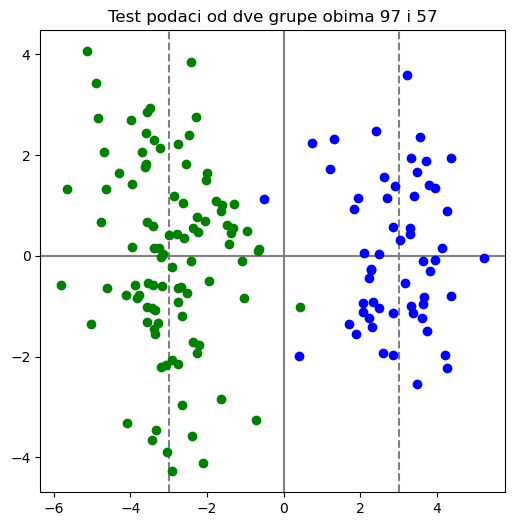

In [3]:
plt.figure(figsize=(6,6))
plt.scatter(grupa1_x,grupa1_y,c='g')
plt.scatter(grupa2_x,grupa2_y,c='b')
plt.axhline(color='gray', zorder=-1)
plt.axvline(color='gray', zorder=-1)
plt.axvline(x=-3, color='gray', linestyle='--', zorder=-1)
plt.axvline(x=3, color='gray', linestyle='--', zorder=-1)
plt.title("Test podaci od dve grupe obima "+str(n0)+' i '+str(n1));

Uobičajeno je da podaci za klasterovanje stižu kao vrste ili kolone neke matrice. Zbog toga, objedinićemo dve grupe tačaka u jednu matricu. Za to koristimo naredbu [`numpy.block`](https://numpy.org/doc/stable/reference/generated/numpy.block.html). Koordinate tačaka biće smeštene duž vrsta matrice $tacke.$

In [4]:
tacke=np.block([[grupa1_x,grupa2_x],[grupa1_y,grupa2_y]]).T 
np.shape(tacke)

(154, 2)

Na startu algoritma potrebno je obezbediti početne centre $c_0$ i $c_1$ za svaki od $2$ klastera $C_0,C_1.$  Izabarćemo npr. tačke $(0,1)$ i $(0,-1).$ Početne tačke centara su namerno izabarane daleko od pravih mesta grupisanja podataka kako bi se jasnije uočio proces progresije ka rešenju. 

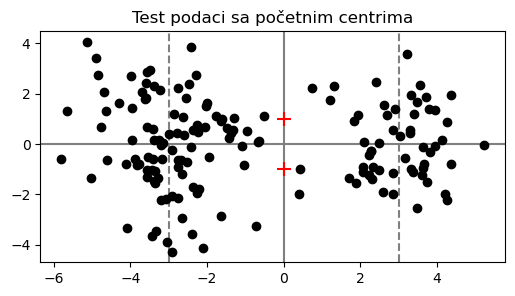

In [5]:
centri=np.array([[0,1.],[0,-1]]) #koordinate jednog centra su jedna vrsta

plt.figure(figsize=(6,3))
plt.scatter(tacke[:,0],tacke[:,1], c='k')  
plt.scatter(centri[:,0],centri[:,1], s=100, c='r', marker='+')
plt.axhline(color='gray', zorder=-1)
plt.axvline(color='gray', zorder=-1)
plt.axvline(x=-3, color='gray', linestyle='--', zorder=-1)
plt.axvline(x=3, color='gray', linestyle='--', zorder=-1)
plt.title("Test podaci sa početnim centrima");

Da bismo mogli da pratimo raspored tačaka iz grupa po klasterima uvešćemo pomoćni niz **labela** koji će pamtiti indeks klastera kome odgovarajuća tačka pripada. Drugim rečima,
$$labela[i]=\left\{\begin{array}{ll}
1,& i-\mbox{ ta tačka nalazi se u prvom klasteru},\\
2,& i-\mbox{ ta tačka nalazi se u drugom klasteru}.
\end{array}
\right.$$

In [6]:
# inicijalizacija pomoćnog niza 
labela=np.zeros(n0+n1,dtype=int)

**I iteracija:** Za svaku tačku određujemo rastojanja od centara. Na osnovu toga dodeljujemo je klasteru sa najbližim centorm.

In [7]:
d0=np.linalg.norm(tacke-centri[0],axis=1)  # rastojanja tačaka od c0
d1=np.linalg.norm(tacke-centri[1],axis=1)  # rastojanja tačaka od c1

labela[d1<d0]=1
print(labela)

[1 1 1 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 1 1 0 1 0 0 1 1 0 1 1 1 0
 0 0 1 1 1 1 1 1 0 0 1 0 0 1 0 0 0 0 0 1 0 1 0 0 1 1 1 1 0 1 0 0 0 0 0 0 1
 0 1 1 1 0 1 1 1 1 1 1 0 0 0 1 0 1 0 1 0 0 1 1 0 1 0 1 0 1 1 1 1 1 1 1 0 1
 0 0 0 1 0 0 1 0 0 0 0 1 1 1 1 1 1 1 0 1 0 1 0 0 1 1 0 1 0 0 0 1 0 1 0 1 0
 1 0 1 1 0 0]


To je dovelo do razdvajanja klastera duž simetrale duži koja spaja centre klastera.

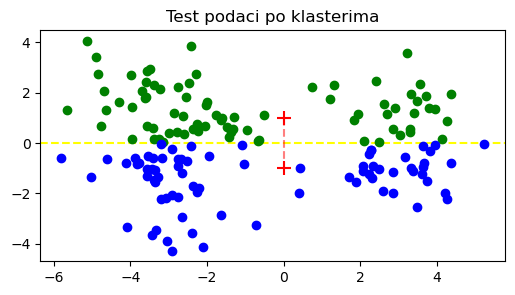

In [8]:
plt.figure(figsize=(6,3))
plt.scatter(tacke[labela==0,0],tacke[labela==0,1], c='g')
plt.scatter(tacke[labela==1,0],tacke[labela==1,1], c='b')
plt.scatter(centri[:,0],centri[:,1], s=100, c='r', marker='+')
plt.axhline(color='yellow', linestyle='--', zorder=-1)
plt.plot(centri[:,0],centri[:,1],'r--',alpha=0.5)
plt.title("Test podaci po klasterima");

Sada određujemo nove vrednosti centara na osnovu dobijenih klastera. Oni će predstavljati centre skupova vektora dva klastera. Informacije o starim centrima čuvamo zbog vizuelnog poređenja napretka postupka.

In [9]:
cstari = centri.copy()
centri[0]=np.mean(tacke[labela==0],axis=0)  #centar klastera C0
centri[1]=np.mean(tacke[labela==1],axis=0)  #centar klastera C1
cstari, centri

(array([[ 0.,  1.],
        [ 0., -1.]]),
 array([[-0.94761584,  1.36529658],
        [-0.60417915, -1.38174041]]))

Izračunavanjem novih centara klastera završena je prva iteracija. Stanje nakon prve iteracije proverićemo grafički.

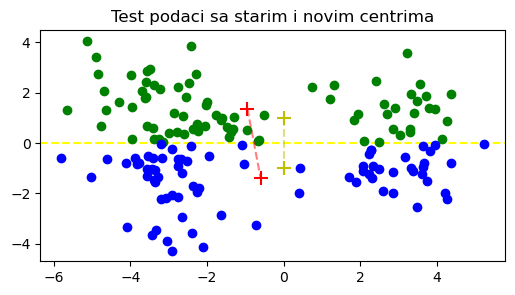

In [10]:
plt.figure(figsize=(6,3))
plt.scatter(tacke[labela==0,0],tacke[labela==0,1], c='g')
plt.scatter(tacke[labela==1,0],tacke[labela==1,1], c='b')
plt.scatter(cstari[:,0],cstari[:,1], s=100, c='y', marker='+')
plt.scatter(centri[:,0],centri[:,1], s=100, c='r', marker='+')
plt.plot(cstari[:,0],cstari[:,1],'y--',alpha=0.5)
plt.plot(centri[:,0],centri[:,1],'r--',alpha=0.5)
plt.axhline(color='yellow', linestyle='--', zorder=-1)
plt.title("Test podaci sa starim i novim centrima");

Uočavamo da su dobijeni klasteri razdvojeni pravom linijom. Nju čine sve tačke koje su na jednakom rastojanju od početnih centara. Zaključujemo da je linija razdvajanja simetrala duži dva početna centra. Za jednačinu simetrale duži određene centrima
$c_1=(x_1,y_1)$ i $c_2=(x_2,y_2),$ koristićemo formulu
$$y=\dfrac{(x_2-x_1)x+\frac12(x_1^2+y_1^2-x_2^2-y_2^2)}{y_1-y_2}\,,\quad x\in\mathbb{R}, $$
koja je dokazana u radnoj svesci 16AfinaGeometrija, u zadatku 1.

Za preostale iteracije K-means algoritma iskoristićemo petlju. Ubacićemo i simetralu duži starih centara kako bi se uočilo da je ona linija razdvajanja dva klastera. Na kraju ponavljamo originalnu podelu ulaznih podataka kako bismo je vizuelno uporedili sa dobijenom klasterizacijom.

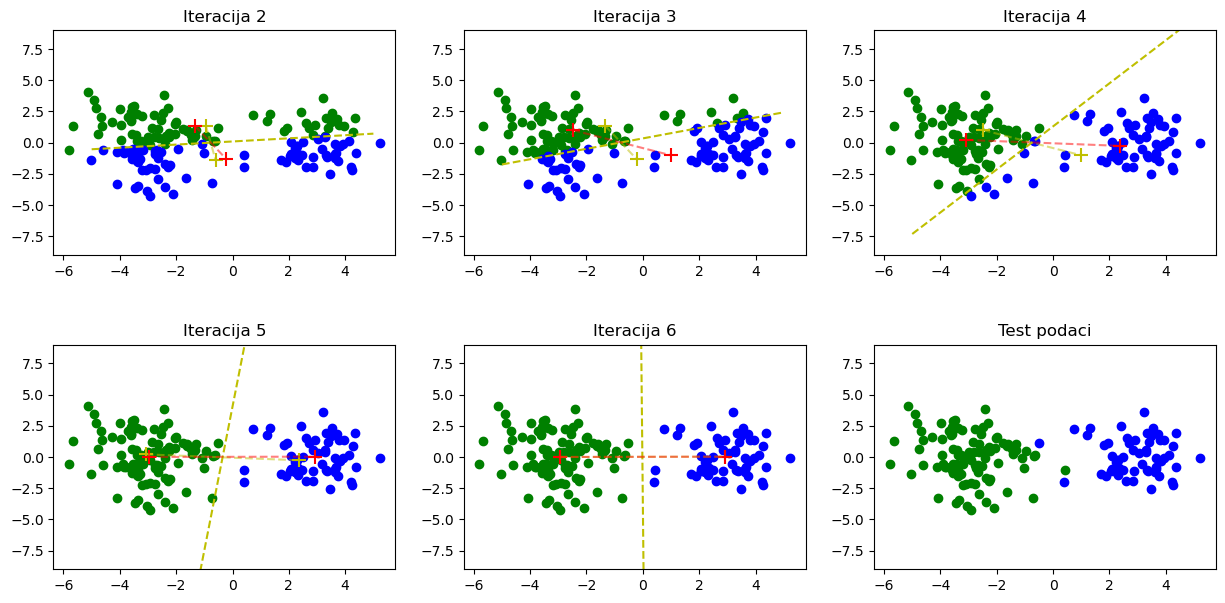

In [11]:
slika=plt.figure(figsize=(15,7))
slika.subplots_adjust(hspace=0.4)

for i in range(5):
    d0=np.linalg.norm(tacke-centri[0],axis=1)  # rastojanja od c0
    d1=np.linalg.norm(tacke-centri[1],axis=1)  # rastojanja od c1

    labela[d1<d0]=1
    labela[d1>d0]=0
    #tackama koje leze na simetrli ne menjamo prethodno dodeljene labele
    
    cstari = centri.copy()
    
    #simetrala
    razl=cstari[1]-cstari[0]  #c1-c0
    suma=cstari[1]+cstari[0]  #c1+c0
    b=np.dot(razl,suma)/2
    x=np.array([-5,5])
    y=(b-razl[0]*x)/razl[1]
    
    #novi centri
    centri[0]=np.mean(tacke[labela==0],axis=0)  #centar klastera C0
    centri[1]=np.mean(tacke[labela==1],axis=0)  #centar klastera C1
    
    #grafički prikaz iteracija
    ax = slika.add_subplot(2,3,i+1)
    plt.title(r"Iteracija {:d}".format(i+2))
    plt.scatter(tacke[labela==0,0],tacke[labela==0,1], c='g')
    plt.scatter(tacke[labela==1,0],tacke[labela==1,1], c='b')
    plt.plot(x,y,'y--')
    plt.scatter(cstari[:,0],cstari[:,1], s=100, c='y', marker='+')
    plt.scatter(centri[:,0],centri[:,1], s=100, c='r', marker='+')
    plt.plot(cstari[:,0],cstari[:,1],'y--',alpha=0.5)
    plt.plot(centri[:,0],centri[:,1],'r--',alpha=0.5)
    plt.ylim(-9,9);

#grafički prikaz originalnih klastera
slika.add_subplot(2,3,6)
plt.scatter(grupa1_x,grupa1_y,c='g')
plt.scatter(grupa2_x,grupa2_y,c='b')
plt.title("Test podaci")
plt.ylim(-9,9);   

Vidimo da je nakon malog broja iteracija K-means algoritam odlično rešio problem klasterizacije zadatog skupa tačaka. U poslednjoj iteraciji došlo je do poklapanja starih i novih centara klastera što sugeriše da promena u rasporedu tačaka unutar klastera više neće biti sa nastavkom iteracija. Zbog toga se postupak algoritma obustavlja.

***

Ideja iza algoritma K-means je veoma jednostavna, vrlo brzo proizvodi jako dobre rezultate, pa otud i njegova veoma česta upotreba. Klasterizacija ovog tipa je veoma pogodna tehnika za eksperiment i istraživanje s obzirom da se veoma malo ulaznih pretpostavki samog korisnika unosi prilikom izvođenja K-means algoritma. Drugim rečima, ima malo prostora za subjektivan uticaj korisnika na dobijene rezultate. Takođe, čak i za veoma velike skupove ulaznih podataka (tj. veliki broj podataka $n$) u najvećem broju slučajeva rezultat se dobija za kratko vreme uz relativno mali broj iteracija. Zbog toga primena K-means algoritma uglavnom podrazumeva niz pokretanja samog algoritma pod različitim početnim uslovima i praćenje promena dobijenih rezultata. Time se veoma često dobija neki dodatni uvid u sam skup podataka $S$ koji se analizira.

***

### Uslovi izlaska iz iteracije

Kriterijum izlaska iz iteracije je veoma bitna stavka svakog iterativnog algoritma. U slučaju klasterizacije potrebno je vagati između kvaliteta dobijenih klastera i dužine trajanja algoritma. Obratiti pažnju prilikom definisanja kriterijuma za zaustavljanje iteracije: uslov izlaska ne mora neophodno da bude dobijanje najboljeg mogućeg rešenja problema klasterizacije. Veoma često dešava se da zaustavni kriterijum treba prilagoditi uslovu da vraćeni rezultat bude samo dovoljno dobar i u okviru prihvatljivog vremenskog okvira. 
Neki od najčešće korišćenih kriterijuma u K-means algoritmu su:
- u dvema uzastopnim iteracijama nema (značajne) promene u načinu razvrstavanja elemenata po klasterima,
- u dvema uzastopnim iteracijama nema (značajne) promene u centrima klastera,
- rastojanje elemenata unutar klastera do odgovarajućeg centra nije veće od neke unapred izabrane granice, itd.

Kriterijumi su dati u opadajućem redosledu prema prosečnoj dužini trajanja K-means algoritma sa njima. Bilo koji od ovih kriterijuma dobro je da se kombinuje sa uslovom maksimalnog dozvoljenog broja iteracija predviđenih za izvršenje algoritma. Ukoliko ne postoji vremensko ograničenje izvršenja, K-means algoritam uvek proizvodi klastere koji su pod izabranim uslovima sa najboljim karakteristikama rastojanja. Međutim to u najvećem broju slučajeva nije globalno najbolje rešenje, već samo lokalno. Određivanje lokalnog minimuma je u velikoj meri određeno izborom početnih vrednosti centara klastera. Zbog toga se preporučuje više poziva algoritma sa različitim početnim centrima ne bi li se pronašlo što bolje rešenje za klasterizaciju. Jedan od načina poređenja obavljenih klasterizacija je izračunavanje **sume kvadrata rastojanja** tačaka od centara klastera kojima pripadaju, s obzirom da je cilj primene K-means algoritma da se minimizira ova vrednost. Ova mera kvalieta zove se **inercija**,
$$inercija=\sum_{i\in(k)}\sum_{v_j\in C_i}\|v_j-c_i\|^2$$
Inercija kvantifikuje varijaciju objekata unutar klastera od njenog tipičnog predstavnika - centra klastera.

Primetimo da Euklidova norma u K-means algoritmu ima veoma bitnu ulogu. Kao prvo kroz meru inercije definiše oblasti klastera i oblik te oblasti. Osim toga, ključna je u generisanju centara klastera s obzirom da centar skupa vektora ima karakteristiku minimalnosti zbira kvadrata rastojanja od elemenata skupa.

Centar skupa vektora nalazi se "unutar" ili između vektora $v_0,v_1,\dots,v_{k-1},$ što nam opisuje nejednakost trougla:
$$\|c\|=\left\|\dfrac1kv_0+\dfrac1kv_1+\dots+\dfrac1kv_{k-1}\right\|\leq\dfrac1k\|v_0\|+\dfrac1k\|v_1\|+\dots+\dfrac1k\|v_{k-1}\|\leq\max_{j\in(k)}\|v_j\|.$$	
Osim toga imamo:
\begin{align}
&\displaystyle\sum_{i\in(k)}(v_i-c)=\theta,\\
&\displaystyle\sum_{i\in(k)}\|v_i-c\|^2=\min_{u\in V}\sum_{i\in(k)}\|v_i-u\|^2
\end{align}

***

### Ugrađena K-means funkcija Python-a

U okviru Pythona, K-means algoritam implementrian je kao deo modula **sklearn.cluster**: [`sklearn.cluster.KMeans`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html). Pozivom ove naredbe generiše se klasa `KMeans` čije metode posle koristimo za sam postupak generisanja klasterizacije.

In [12]:
from sklearn.cluster import KMeans

Upoznaćemo `KMeans` klasu Pythona detaljnije na primeru. Osnovna sintaksa poziva K-means algoritma za skup podataka `tacke` je:
>```python
izlaz=KMeans(n_clusters=8, init='k-means++', n_init=10, max_iter=300, tol=1e-4)
izlaz.fit(tacke)
>```

Svi argumenti u pozivu klase su opcioni. Poziv klase ima još opcionih argumenata, opisaćemo one koji su ovde navedeni.
- `n_clusters` argument služi za unos broja klastera $k.$ Podrazumevana vrednost je $k=8.$
- `init` opcija služi da se definiše način izbora početnih centara. Standardna vrednost joj je `k-means++`  kojom se pospešuje brzina konvergencije K-means algoritma. Karakteristika takvih početnih centara je da se biraju sa većim međusobnim razmakom nego što se to u opštem slučaju postiže nasumičnim izborom centara i uskladu sa funkcijom raspodele podataka. Nasumičan izbor centara iz skupa podatka dobija se vrednošću ovog argumenta `random`.
- `n_init` definiše za koliko različitih početnih centara pokretati algoritam prilikom izbora najbolje klasterizacije. Standardna vrednost je 10. Rezultat algoritma postaje klasterizacija sa najboljim rezultatom inercije.
- `max_iter` definiše maksimalan broj dozvoljenih iteracija. Ukoliko se ne navede, podrazumevana vrednost je 300.
- `tol` je tolerancija razmaka između centara klastera u dvema uzastopnim iteracijama koja je dovoljna za prekid algoritma. Ukoliko se ne navede, podrazumevana vrednost je  $1e-4.$

<div class="alert alert-block alert-info">
<b>Napomena:</b> Ugrađena funkcija <b>`KMeans`</b> koristi podatke raspoređene po <b>vrstama</b> ulazne matrice podatka. </div>

Atributi rezultata koje proizvodi KMeans naredba su:
- `cluster_centers_` sadrži koordinate centara klastera
- `labels_`  sadrži oznaku klastera svake tačke, tj. labele svake tačke
- `inertia_` vrednost inercije
- `n_iter_` broj iteracija izvršenog algoritma

Metod `fit` klase `KMeans` pokreće izračunavanje klasterizacije nad podacima koji su unešeni kao njegov argument. 

**Primer 3.** Primenićemo ugrađenu funkciju KMeans za klasterizaciju skupa tačaka u 3D sačinjene od 4 grupe tačaka. U okviru biblioteke Matplotlib, za crtanje 3D grafika potrebna je instalacija **Axes3D** objekta koji se nalazi u [mpl_toolkits.mplot3d modulu](https://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html). 

In [13]:
from mpl_toolkits.mplot3d import Axes3D

In [14]:
#broj elemenata svake od grupa generisanih podataka
n=np.array([43 , 81 , 66 , 55])
granice=np.append([0],np.cumsum(n))
total=np.sum(n)
print(total)   #ukupan broj tačaka za generisanje

#kreiranje centara
x_centri=rndm.randint(-5,5,4)
y_centri=rndm.randint(-5,5,4)
z_centri=rndm.randint(-5,5,4)
centri=np.block([[x_centri],[y_centri],[z_centri]]).T #jedna vrsta sadrzi koordinate jednog centra
centri.shape

245


(4, 3)

In [15]:
%matplotlib notebook 

<IPython.core.display.Javascript object>


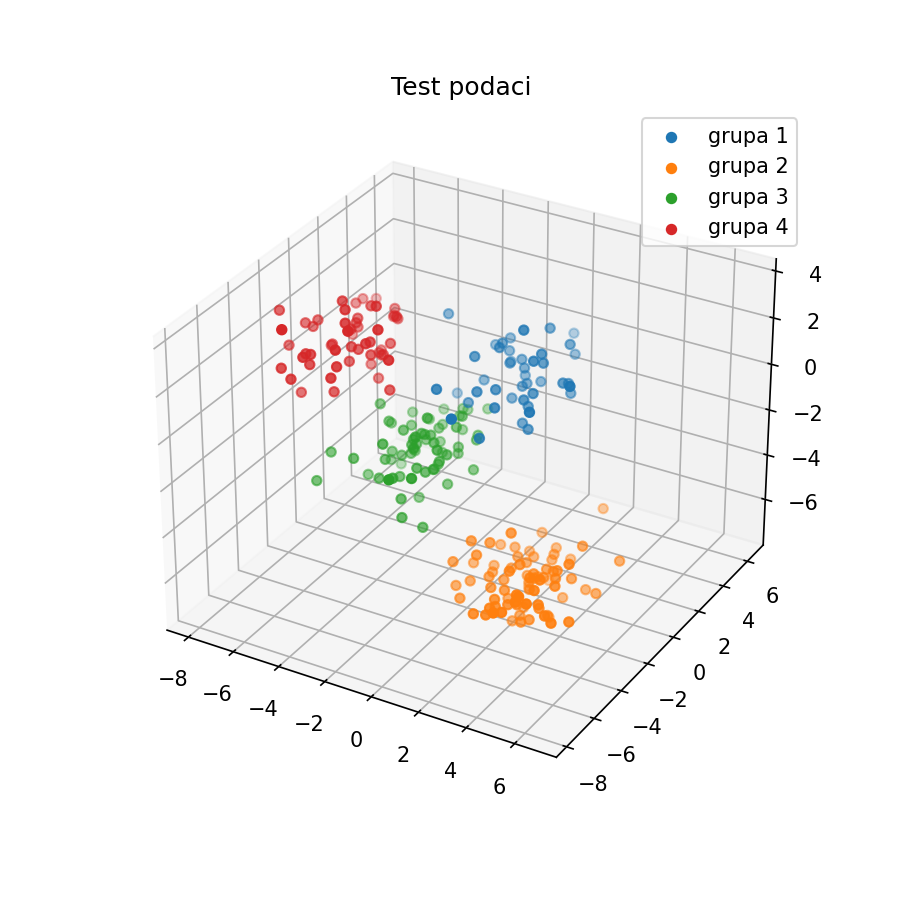

In [16]:
tacke=np.empty([0,3])   #skup svih podataka inicijelizacija

podaci= plt.figure(figsize=(6,6))
ax = podaci.add_subplot(projection='3d')
plt.title("Test podaci")

for i in range(4):
    x_koordinate=rndm.normal(x_centri[i],1.1,n[i])
    y_koordinate=rndm.normal(y_centri[i],1.5,n[i])
    z_koordinate=rndm.normal(z_centri[i],0.8,n[i])
    pom=np.block([[x_koordinate],[y_koordinate],[z_koordinate]]).T
    tacke=np.block([[tacke],[pom]])
    ax.scatter(x_koordinate,y_koordinate,z_koordinate,label=r"grupa {:d}".format(i+1))
    ax.legend(loc='upper right')

In [17]:
%matplotlib inline

In [18]:
tacke.shape

(245, 3)

In [19]:
from sklearn.cluster import KMeans

Proverićemo rezultate klasterizacije nad generisanim podacima za različite vrednosti broja klastera.

In [20]:
izlaz=KMeans(n_clusters=2,n_init='auto')
izlaz.fit(tacke)

  File "C:\Users\jovan\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 217, in _count_physical_cores
    raise ValueError(


KMeans(n_clusters=2, n_init='auto')

In [21]:
print(izlaz.inertia_)
print(izlaz.cluster_centers_)
print(izlaz.n_iter_)
print(izlaz.labels_[20:100])
print(izlaz.labels_[150:200])

4174.171881981216
[[ 4.15515699 -4.83303849 -3.99656472]
 [-3.77132728  1.00689736 -1.33794801]]
8
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1]


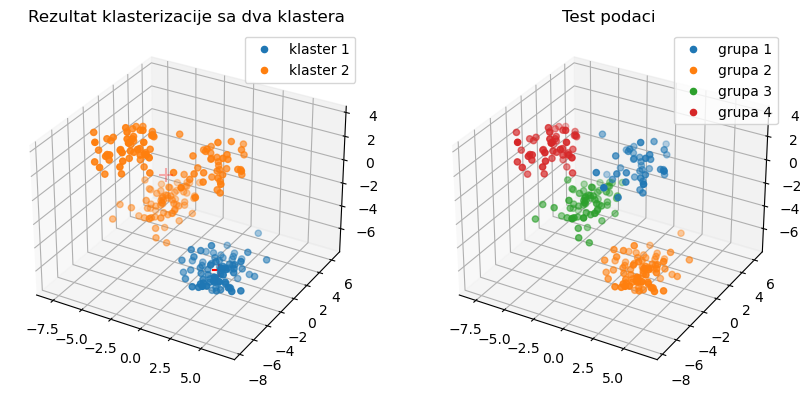

In [22]:
klasteri= plt.figure(figsize=(10,5))

ax1 = klasteri.add_subplot(121, projection='3d')
plt.title("Rezultat klasterizacije sa dva klastera")
ax1.scatter(izlaz.cluster_centers_[:,0],izlaz.cluster_centers_[:,1],izlaz.cluster_centers_[:,2], 
            s=100, c='r', marker='+')
for i in range(2):
    ax1.scatter(tacke[izlaz.labels_==i,0],tacke[izlaz.labels_==i,1],tacke[izlaz.labels_==i,2],
                label=r"klaster {:d}".format(i+1))
    ax1.legend(loc='upper right');
    
ax2 = klasteri.add_subplot(122, projection='3d') 
plt.title("Test podaci")
for i in range(4):
    ax2.scatter(tacke[granice[i]:granice[i+1],0],tacke[granice[i]:granice[i+1],1],
                tacke[granice[i]:granice[i+1],2],label=r"grupa {:d}".format(i+1))
    ax2.legend(loc='upper right')

In [23]:
izlaz=KMeans(n_clusters=3,n_init='auto')
izlaz.fit(tacke)


print(izlaz.inertia_)
print(izlaz.cluster_centers_)
print(izlaz.n_iter_)
print(izlaz.labels_[20:100])
print(izlaz.labels_[150:200])

2029.6161228293713
[[-2.92602581 -0.26376198  1.20715568]
 [ 4.15515699 -4.83303849 -3.99656472]
 [-5.02647188  2.89363396 -5.11704137]]
4
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1]
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 0 0 0 0 0 0 0 0 0]


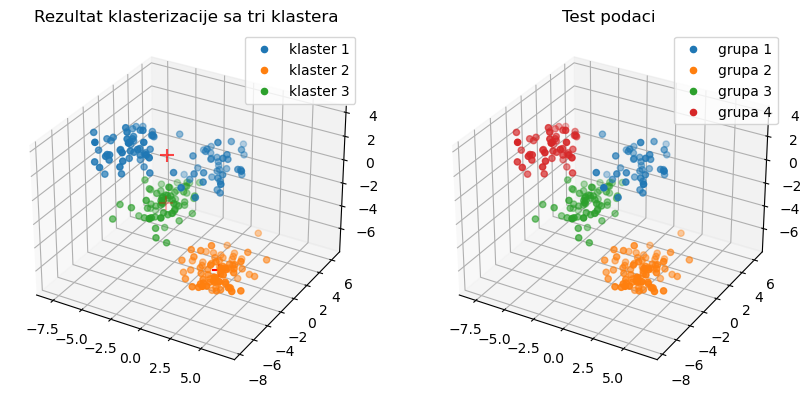

In [24]:
klasteri= plt.figure(figsize=(10,5))

ax1 = klasteri.add_subplot(121, projection='3d')
plt.title("Rezultat klasterizacije sa tri klastera")
ax1.scatter(izlaz.cluster_centers_[:,0],izlaz.cluster_centers_[:,1],izlaz.cluster_centers_[:,2], 
            s=100, c='r', marker='+')
for i in range(3):
    ax1.scatter(tacke[izlaz.labels_==i,0],tacke[izlaz.labels_==i,1],tacke[izlaz.labels_==i,2],
                label=r"klaster {:d}".format(i+1))
    ax1.legend(loc='upper right');
    
ax2 = klasteri.add_subplot(122, projection='3d') 
plt.title("Test podaci")
for i in range(4):
    ax2.scatter(tacke[granice[i]:granice[i+1],0],tacke[granice[i]:granice[i+1],1],
                tacke[granice[i]:granice[i+1],2],label=r"grupa {:d}".format(i+1))
    ax2.legend(loc='upper right') 

In [25]:
izlaz=KMeans(n_clusters=4,n_init='auto')
izlaz.fit(tacke)


print(izlaz.inertia_)
print(izlaz.cluster_centers_)
print(izlaz.n_iter_)
print(izlaz.labels_[20:100])
print(izlaz.labels_[150:250])

1006.0476223951975
[[ 4.15515699 -4.83303849 -3.99656472]
 [-5.02647188  2.89363396 -5.11704137]
 [-5.13993867 -1.8555554   2.06187399]
 [-0.0942768   1.77225287  0.11391133]]
4
[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


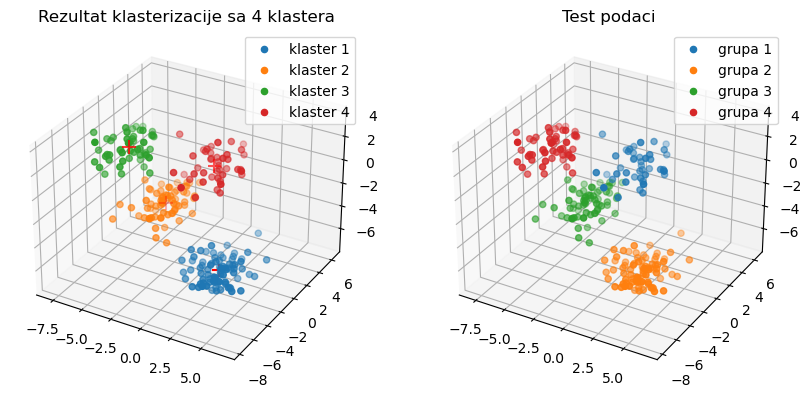

In [26]:
klasteri= plt.figure(figsize=(10,5))
ax1 = klasteri.add_subplot(121, projection='3d')
plt.title("Rezultat klasterizacije sa 4 klastera")
ax1.scatter(izlaz.cluster_centers_[:,0],izlaz.cluster_centers_[:,1],izlaz.cluster_centers_[:,2], 
            s=100, c='r', marker='+')
for i in range(4):
    ax1.scatter(tacke[izlaz.labels_==i,0],tacke[izlaz.labels_==i,1],tacke[izlaz.labels_==i,2],
                label=r"klaster {:d}".format(i+1))
    ax1.legend(loc='upper right');
    
ax2 = klasteri.add_subplot(122, projection='3d') 
plt.title("Test podaci")
for i in range(4):
    ax2.scatter(tacke[granice[i]:granice[i+1],0],tacke[granice[i]:granice[i+1],1],
                tacke[granice[i]:granice[i+1],2],label=r"grupa {:d}".format(i+1))
    ax2.legend(loc='upper right') 

In [27]:
izlaz=KMeans(n_clusters=5,n_init='auto')
izlaz.fit(tacke)

print(izlaz.inertia_)
print(izlaz.cluster_centers_)
print(izlaz.n_iter_)
print(izlaz.labels_[20:100])
print(izlaz.labels_[150:250])

939.241283011622
[[ 4.15515699 -4.83303849 -3.99656472]
 [-5.02647188  2.89363396 -5.11704137]
 [-5.13993867 -1.8555554   2.06187399]
 [-0.28383861  2.70665145  0.22179399]
 [ 0.22560874  0.19545525 -0.06814066]]
5
[3 3 4 3 3 4 4 4 3 3 3 3 3 4 3 3 3 4 3 4 4 3 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


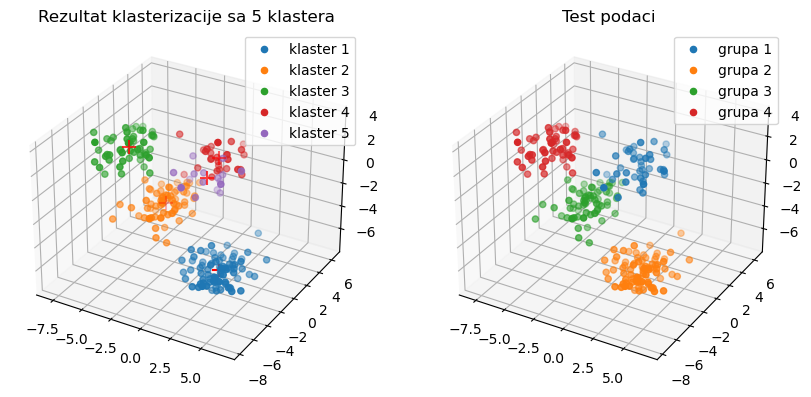

In [28]:
klasteri= plt.figure(figsize=(10,5))
ax1 = klasteri.add_subplot(121, projection='3d')
plt.title("Rezultat klasterizacije sa 5 klastera")
ax1.scatter(izlaz.cluster_centers_[:,0],izlaz.cluster_centers_[:,1],izlaz.cluster_centers_[:,2], 
            s=100, c='r', marker='+')
for i in range(5):
    ax1.scatter(tacke[izlaz.labels_==i,0],tacke[izlaz.labels_==i,1],tacke[izlaz.labels_==i,2],
                label=r"klaster {:d}".format(i+1))
    ax1.legend(loc='upper right');
    
ax2 = klasteri.add_subplot(122, projection='3d') 
plt.title("Test podaci")
for i in range(4):
    ax2.scatter(tacke[granice[i]:granice[i+1],0],tacke[granice[i]:granice[i+1],1],
                tacke[granice[i]:granice[i+1],2],label=r"grupa {:d}".format(i+1))
    ax2.legend(loc='upper right')   

Postupak možemo da nastavimo i za više klastera. Primećujemo da mera inercije nastavlja da opada sa brojem klastera. To možemo da očekujemo da se nastavi sa povećanjem broja klastera s obzirom da se takvim procesom smanjuje broj vektora unutar svakog od klastera. Zbog toga samo minimizacija funkcije inercije nije dovoljan kriterijum za opis kvaliteta dobijene klasterizacije. U vezi sa tim je problem određivanja samog broja klastera. Ukoliko to nije podatak poteko iz domenskog znanja, određivanje broja klastera predstavlja još jedan od ključnih elemenata particionog algoritma za njegovu uspešnu realizaciju.

***

## Određivanje broja klastera

Jedan od glavnih problema K-means algoritma jeste odlučivanje o optimalnom broju klastera u koje je podatke potrebno razdeliti. Cilj klasterizacije nije samo pravljenje bilo kakve particije, već kreiranje dobrog rasporeda elemenata koji donosi neko tumačenje podataka ili ističe pravilnosti među njima. Broj klastera $k$ u tome ima presudnu ulogu. Kvalitetan raspored elemenata skupa $S$ unutar klastera prepoznaje se po min-max karakteristikama:
- tačke unutar klaster su međusobno bliske,
- tačke jednog klastera nalaze se na većem rastojanju od preostalih klastera.

Prevelik broj klastera ponekad može da se prepozna po postojanju klastera koji imaju veoma mali broj elemenata: 1 ili 2.

Zaključak velikog broja analiza i primena: najkritičniji parametar K-means algoritma je $k.$ Problem nastaje jer ne postoji egzaktan postupak ili kriterijum kojim bi se parametar $k$ odredio.
Zbog svoje brzine izvršenja, najčešće se sam algoritam K-means nezavisno pokreće za različite vrednosti $k.$ Zatim se na osnovu dobijenih rezultata bira ona vrednost $k$ za koju dobijena particija ima najviše smisla nekom poznavaocu uslova i izvora podataka, tj. [domenskom ekspertu](https://wiki.c2.com/?DomainExpert). Osim toga mogu da se koriste neke specijalno dizajnirane numeričke mere dobijenih rezultata - kriterijumi kvaliteta dobijene particije. Preporuka je da se kombinuje više različitih kriterijuma za utvrđivanje "optimalne" vrednosti parametra $k.$ 

Dve mere koje su najviše u upotrebi jesu inercija i koeficijent siluete.

***

### Inercija

- Inerciju smo već upoznali.
$$inercija=\sum_{i=1}^k\sum_{v_j\in C_i}\|v_j-c_i\|^2$$

Intuitivno, inercija meri koliko su tačke unutar klastera udaljene od centra tog klastera. Cilj K-means algoritma je da se ta vrednost minimizira. Opseg vrednosti inercije je od nule, pa do veoma velikih pozitivnih vrednosti.


Uobičajeno je da se za postupak odlučivanja koristi grafički prikaz inercije u zavisnosti od broja klastera $k.$
 Poznato je da inercija opada sa povećanjem broja klastera $k.$ Ono što se koristi kao kriterijum odlučivanja za broj klastera jeste pojava da počevši od neke vrednosti $k$ ova funkcije gubi na brzini opadanja. Dakle, počevši od neke vrednosti broja klastera $k$ poboljšanja u rastojanju unutar klastera postaju neprimetna. Pre toga poboljšanja u inerciji su veoma značajna. Takva pojava na grafiku funkcije inercije popularno se naziva "lakat".
<div>
   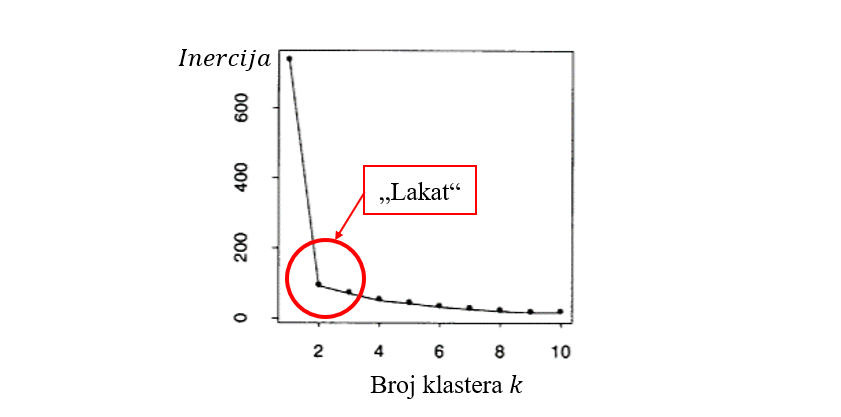  
</div>

**Primer 4.** Iskoristićemo podatke iz primera 3 i prikazati inerciju u zavisnosti od broja klastera $k.$

In [29]:
grafik=np.empty([2,0])
for k in range(2,10):
    izlaz=KMeans(n_clusters=k,n_init='auto')
    izlaz.fit(tacke)
    grafik=np.block([grafik,np.array([[k],[izlaz.inertia_]])])

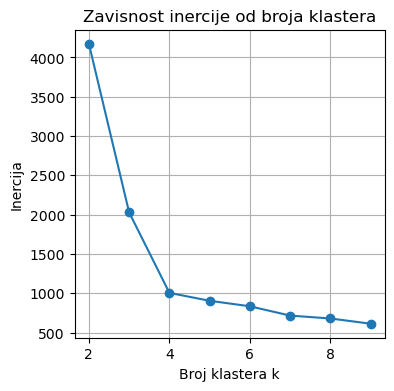

In [30]:
plt.figure(figsize=(4,4))
plt.plot(grafik[0],grafik[1],'o-')      
plt.xlabel("Broj klastera k")
plt.ylabel("Inercija")
plt.title("Zavisnost inercije od broja klastera")
plt.grid()

Primećujemo traženi lakat za $k=4$ što odgovara generisanim podacima.

***

### Koeficijent siluete

Narednom merom kvaliteta klasterizacije ideja je procena varijacije unutar klastera i varijacije između različitih klastera. Podržava ideju cilja za visokom sličnošću podataka unutar klastera i niskom sličnošću podataka između različitih klastera.
- [Koeficijent siluete](https://scikit-learn.org/stable/modules/clustering.html#silhouette-coefficient): je mera kojom se vrednuje relativna međusobna separacija klastera. Ova ocena daje se za svaki podatak iz skupa koji se klasterizuje i bazira se na dva faktora koja opisuju način razmeštaja podataka po klasterima:
    - Koliko je tačka bliska sa preostalim tačkama unutar dodeljenog klastera.
    - Koliko je tačka daleko od preostalih tačaka izvan dodeljenog klastera.

Za tačku $v_i$ koja pripada klasteru $C_p$ označimo prosečno rastojanje tačke $v_i$ od ostalih tačaka ovog klastera sa:
$$a(i)=\frac{1}{|C_p|-1}\sum_{v\in C_p}\|v-v_i\|,\quad |C_p|>1.$$
Deli se brojem $|C_p|-1$ jer je $\|v_i-v_i\|=0.$

Odstojanje tačke $v_i$ od svih ostalih klastera računamo prema formuli najmanjeg prosečnog rastojanja od ostalih klastera:
$$b(i)=\min_{j\neq p}\left\{\frac{1}{|C_j|}\sum_{v\in C_j}\|v-v_i\|\right\}.$$

Koeficijent siluete za tačku $v_i$ tada je dat izrazom:
$$s(i)=\frac{b(i)-a(i)}{\max\{a(i),b(i)\}}=\left\{\begin{array}{ll}
1-\frac{a(i)}{b(i)},& a(i)<b(i),\\
0,& a(i)=b(i),\\
\frac{b(i)}{a(i)}-1,&a(i)>b(i).
\end{array}
\right.$$
Narednom slikom objašnjen je odnos vrednosti $a(i)$ i $b(i).$

<div>
   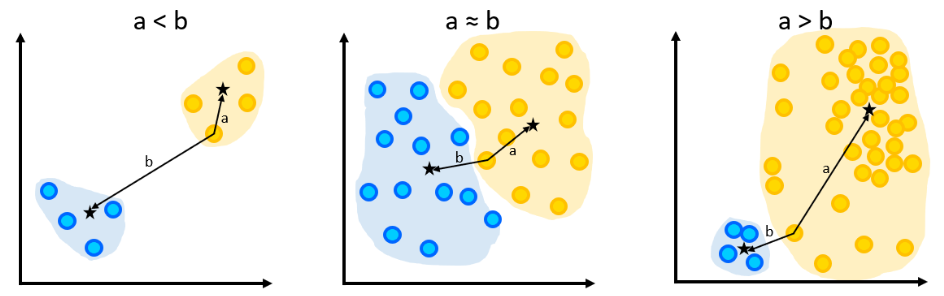  
</div>

Vrednost koeficijenta siluete kreće se u opsegu $[-1, 1],$ gde je 1 oznaka najkvalitetnije klasterizacije, a -1 najgore.

Iračunavanjem prosečnog koeficijenta siluete svih tačaka dobija se koeficijent siluete obavljene klasterizacije, što je dobra ocena izvršenog postupka. Bira se broj klastera $k$ koji proizvodi maksimalan koeficijent siluete.

**Primer 5.** Modul **sklearn.metrics** poseduje naredbu za izračunavanje prosečnog koeficijenta siluete. Iskoristićemo podatke iz primera 3 za proveru klasterizacija sa različitim brojem klastera $k.$

In [31]:
from sklearn.metrics import silhouette_score

In [32]:
grafik=np.empty([2,0])
for k in range(2,10):
    izlaz=KMeans(n_clusters=k)
    izlaz.fit(tacke)
    grafik=np.block([grafik,np.array([[k],[silhouette_score(tacke,izlaz.labels_)]])])

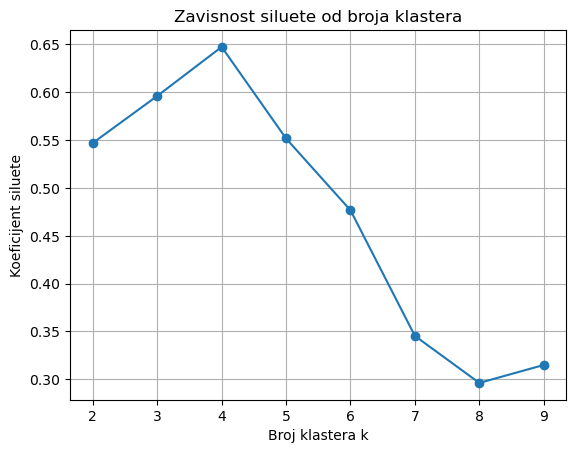

In [33]:
plt.plot(grafik[0],grafik[1],'o-')      
plt.xlabel("Broj klastera k")
plt.ylabel("Koeficijent siluete")
plt.title("Zavisnost siluete od broja klastera")
plt.grid()

***

## Karakteristike K-means klasterizacije

Klasteri dobijeni ovim algoritmom imaju približno sferne oblike i algoritam teži da tačke ravnomerno rasporedi unutar klastera, u smislu ravnomerne raspodele broja tačaka po klasterima. To je karakteristika svih postupaka zasnovanih na particiji. Algoritam ne radi dobro kada klasteri imaju veliku razliku u gustinama tačaka. Da bi se otkrili klasteri kompleksnog oblika i sadržaja metodi particije su unapređeni. Razvijeni su algoritmi klasterizacije koji koriste pojam gustine podataka. Ukratko, ideja iza ovakvih algoritama se bazira na širenju "granica" klastera dokle god je gustina u okolini prevazilazi određeni prag tolerancije. Na primer, za svaku tačku podatka unutar klastera, okolina izabranog poluprečnika mora da sadrži barem minimalni broj tačaka. Takvi kriterijumi se koriste za filtriranje šuma u podacima ili za otkrivanje izuzetaka, kao i za generisanje klastera proizvoljnog oblika prostiranja.

Razmislite koje osobine imaju skupovi kojima pripadaju sve tačke prostora najbliže nekom fiksiranom centru klastera?

Klaster analiza je živa oblast istraživanja. Neke od primena tiču se data mining, statistika, mašinsko učenje, tehnologija  baza prostornih podataka, pronalaženje informacija, biologija, marketing, itd. Zahvaljujući postojanju ogromnih baza podataka klaster ananliza je visoko aktivna oblast.

**Primer 6.** 
Један од основних проблема приликом развоја и имплементације алгоритама нумеричке линеарне алгебре јесте њихово тестирање коректности. Наиме, алгоритми имају својство да раде баш оно што је откуцано, чак и ако то није оно што смо планирали! Због тога је потребно дизајнирати тестове помоћу којих се анализира начин рада програмског кода и постојање багова у њему. Такве вештачке услове провере рада и логичког дизајна алгоритма називамо тест примерима. Планирање тест примера представља својеврстан проблем за себе. 

За алгоритме кластеризације, и њима сродне друге алгоритма, Python модул Scikit learn поседује подршку за за генерисање скупова података погодних за тестирање алгоритама. 
<div>
   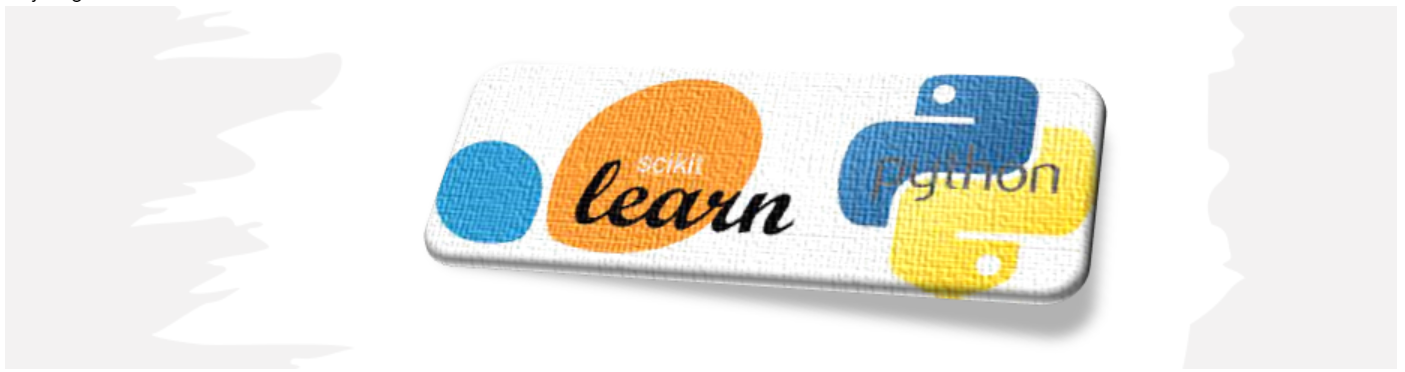
</div>

Наредба [`make_blobs()`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html) креира податке задатог обима и димензије са карактеристикама кластера које желимо. Елементи појединачних кластера имају карактеристике нормалне расподеле својих координата. Параметри наредбе `make_blobs` којима се одређује изглед података, и њихове подразумеване вредности, су:
- `n_samples`= 100, представља укупан број података уколико је унешена једна вредност. Када је унос низ или листа, она представља број података за сваки од појединачних кластера;
- `n_features`= 2, димензионалност података; 
- `centers`= None, број центара или фиксиране координате центара;
- `cluster_std`= 1.0, стандардно одступање елемената унутар кластера од центара;
- `center_box`= -10.0, 10.0, опсег координата центара кластера када се они задају случајним избором;
- `shuffle`= True, мешање података приликом излаза, тј. редослед података није у складу са кластером података коме припада;
- `return_centers`= False, излазни подаци наредбе садрже координате центара генерисаних кластера.

Излаз наредбе представљају:
- $X$ - матрица генерисаних податка димензије `n_samples` $\times$ `n_features`. Dakle podaci su raspoređeni duž vrsta matrice.
- $y$ - вектор лабела за сваки од генерисаних податка
- $c$ - низ координата генерисаних центара димензија `n_centers` $\times$ `n_features`. Постоји као излаз само када је `return_centers`= True.

За овај задатак креиран је тест пример скупа дводимензионалних података наредбом `make_blob`. Подаци су подељени у 3 кластера са 113, 142 и 135 елемената.

In [34]:
from sklearn.datasets import make_blobs

In [35]:
n=np.array([113,142,135])

tacke, labele, centri = make_blobs(n_samples=n, n_features=2, cluster_std=[1.2,1.3,0.9], return_centers=True)
print(tacke.shape)
print(labele.shape)
print(centri.shape)
print(centri)
print(labele[:20])

(390, 2)
(390,)
(3, 2)
[[-2.77685626  4.63029927]
 [-6.63961103 -8.74289946]
 [ 7.62175307  4.49180651]]
[2 2 1 1 0 0 1 1 0 1 1 0 0 2 0 0 1 1 1 2]


Графички приказ тест-података добија се следећим наредбама.

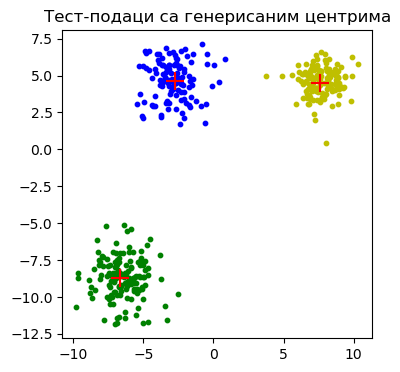

In [36]:
grupa1=tacke[labele==0]
grupa2=tacke[labele==1]
grupa3=tacke[labele==2]
plt.figure(figsize=(4,4))
plt.scatter(grupa1[:,0],grupa1[:,1],c='b', s=10)
plt.scatter(grupa2[:,0],grupa2[:,1],c='g', s=10)
plt.scatter(grupa3[:,0],grupa3[:,1],c='y', s=10)
plt.scatter(centri[:,0],centri[:,1], s=150, c='r', marker='+')
plt.title("Тест-подаци са генерисаним центрима");

Уграђеном наредбом K-means алгоритма спровешћемо овај алгоритам над подацима `tacke` за број кластера $k=2,3,4,5.$ Израчунаћемо коефицијент инерције и силуете за сваку од кластеризација. На основу разултата направићемо графике ових коефицијената у функцији од $k.$

In [37]:
grafikinercije=np.empty([2,0])
grafiksiluete=np.empty([2,0])
for k in range(2,6):
    izlaz=KMeans(n_clusters=k)
    izlaz.fit(tacke)
    grafikinercije=np.block([grafikinercije,np.array([[k],[izlaz.inertia_]])])
    grafiksiluete=np.block([grafiksiluete,np.array([[k],[silhouette_score(tacke,izlaz.labels_)]])])  

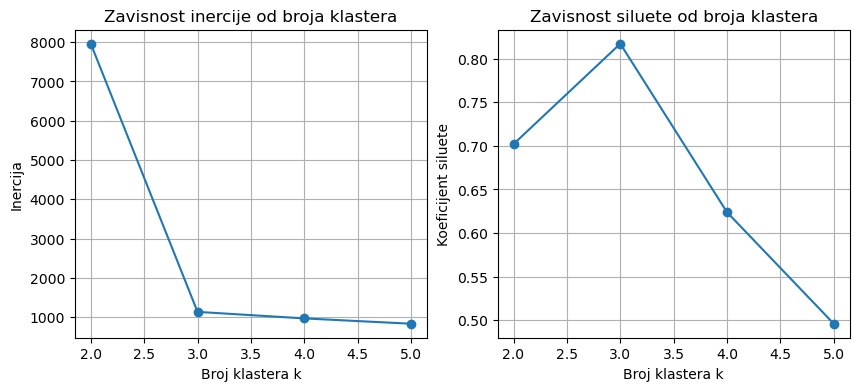

In [38]:
grafici=plt.figure(figsize=(10,4))

ax=grafici.add_subplot(121)
plt.plot(grafikinercije[0],grafikinercije[1],'o-')      
plt.xlabel("Broj klastera k")
plt.ylabel("Inercija")
plt.title("Zavisnost inercije od broja klastera")
plt.grid()

ax=grafici.add_subplot(122)
plt.plot(grafiksiluete[0],grafiksiluete[1],'o-')      
plt.xlabel("Broj klastera k")
plt.ylabel("Koeficijent siluete")
plt.title("Zavisnost siluete od broja klastera")
plt.grid();

***

**Primer 7.** Сегментација слике је поступак поделе слике на регионе који су релативно хомогене структуре. Пример слике и сегментиране слике дат је у наставку.

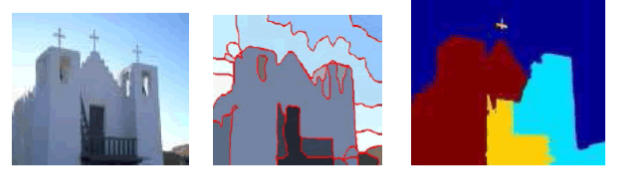

За поступак сегментације третира се сваки пиксел као вектор вредности RGB канала. Другим речима сваки пиксел је вектор тродимензионалног простора где одговарајуће компоненте означавају интензитет одговарајућег канала RGB простора слика. За слику учитану наредном кодном ћелијом спровешћемо сегментацију слике у боји употребом K-means алгоритма. 

In [39]:
import scipy.datasets as scd

In [ ]:
!pip install pooch

In [40]:
rakun=scd.face()
type(rakun)

numpy.ndarray

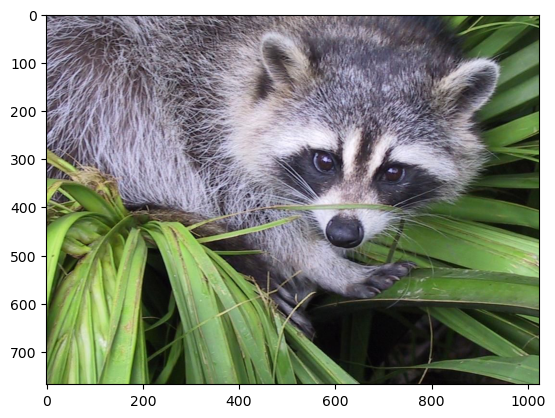

In [41]:
plt.imshow(rakun);

In [42]:
rakun.shape

(768, 1024, 3)

In [43]:
pikseli=np.float32(rakun.reshape(-1,3))
pikseli.shape

(786432, 3)

Приказаћемо резултате кластеризације слике за различит број кластера. Пиксели који припадају истом кластеру приказани су истом бојом.

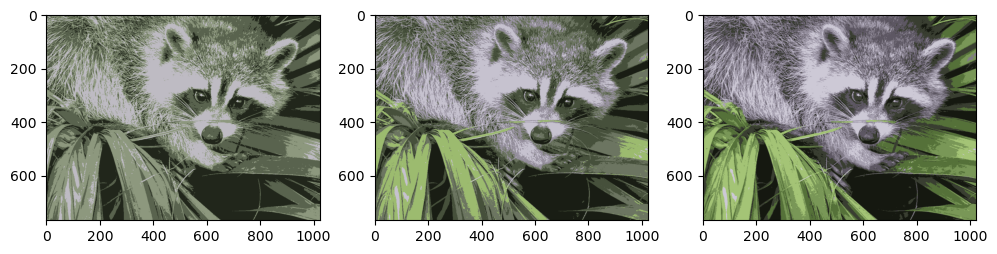

In [44]:
plt.figure(figsize=(12,6))
br_klastera=[4,6,9]
for i in range(3):
    kmeans_seg=KMeans(n_clusters=br_klastera[i],n_init=10)
    kmeans_seg.fit(pikseli)
    segm_slika=kmeans_seg.cluster_centers_[kmeans_seg.labels_].astype(np.uint8)
    segm_slika=segm_slika.reshape(rakun.shape)
    plt.subplot(1,3,i+1)
    plt.imshow(segm_slika)

Продужићемо сада векторе пиксела за њихове координате на слици. Другим речима, сваком RGB вектору додаћемо индекс врсте и колоне у којој се одговарајући пиксел налази на слици. На тај начин сваки пиксел буде представљен петодимензионалним вектором.

In [45]:
rakun_5d=np.empty((rakun.shape[0],rakun.shape[1],5))
rakun_5d[:,:,:3]=rakun
rakun_5d[:,:,3:]=np.indices(rakun.shape[:-1]).transpose((1,2,0))
rakun_5d.shape

(768, 1024, 5)

In [46]:
pikseli5D=np.float32(rakun_5d.reshape(-1,5))
pikseli5D.shape

(786432, 5)

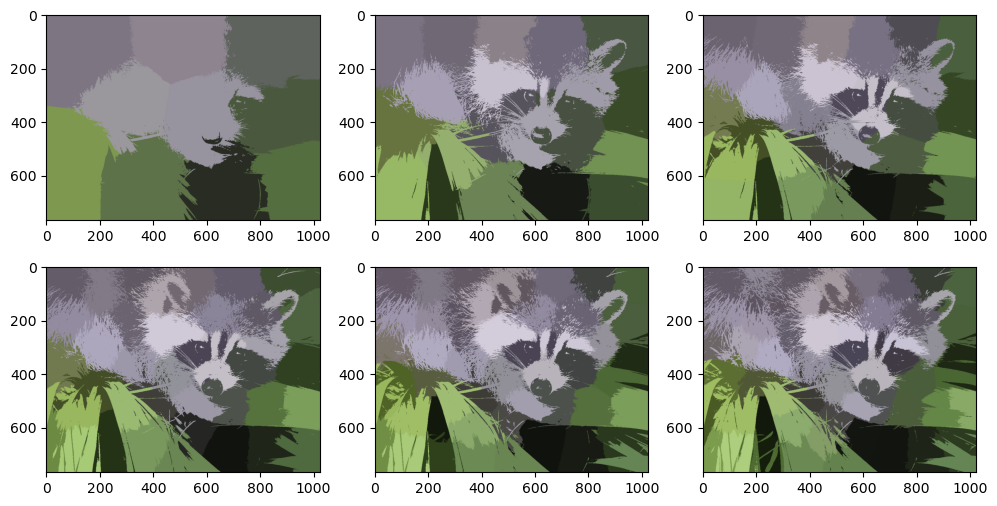

In [47]:
plt.figure(figsize=(12,6))
br_klastera=[10,20,30,40,50,60]
for i in range(6):
    kmeans_seg=KMeans(n_clusters=br_klastera[i],n_init=10)
    kmeans_seg.fit(pikseli5D)
    segm_slika=kmeans_seg.cluster_centers_[kmeans_seg.labels_].astype(np.uint8)
    segm_slika=segm_slika[:,:3].reshape(rakun.shape)
    plt.subplot(2,3,i+1)
    plt.imshow(segm_slika)

За вежбу можете да пробате кластеризацију када је слика дата у другим просторима боја као [CieLab](https://scikit-image.org/docs/stable/api/skimage.color.html#skimage.color.convert_colorspace), [HSV](https://scikit-image.org/docs/stable/auto_examples/color_exposure/plot_rgb_to_hsv.html). Осим тога можете да пробате кластеризацију када су компоненте вектора нормализоване.

***

Klasteri dobijeni K-means algoritmom imaju približno sferne oblike i algoritam teži da tačke ravnomerno rasporedi unutar klastera, u smislu ravnomerne raspodele broja tačaka po klasterima. Algoritam ne radi dobro kada klasteri imaju veliku razliku u gustinama tačaka.

***